# Função hsv_to_rgb(hsvImg)

## Entradas:

- hsvImg - Imagem hsv onde o canal H varia de 0 a 1, o canal S varia de 0 a 1 e o canal V varia de 0 a 255

## Saída:

- Retorna uma imagem RGB com intensidades entre 0 a 255. 

In [15]:
def hsv_to_rgb(hsvImg):

    ''' Função hsv_to_rgb(hsvImg)
    
    Entradas:
    - hsvImg: Imagem hsv onde o canal H varia de 0 a 1, o canal S varia de 0 a 1 e o canal
    V varia de 0 a 255
    
    Saída:
    - Retorna uma imagem RGB com intensidades entre 0 a 255. '''
    
    #Ajustando valores de h para graus
    h = hsvImg[:,:,0].ravel()*360
    s = hsvImg[:,:,1].ravel()
    
    # Normalizando canal V
    v = hsvImg[:,:,2].ravel()/255
    
    R = np.zeros(h.size)
    G = np.zeros(h.size)
    B = np.zeros(h.size)
    
    c = v*s
    x = c*(1-np.absolute( (h/60)%2 - 1 ))
    m = v - c
    
    # Vetores de indeces para cada intervalor de H 
    h0 = (h>=0) & (h<60) 
    h1 = (h>=60) & (h<120)
    h2 = (h>=120) & (h<180)
    h3 = (h>=180) & (h<240)
    h4 = (h>=240) & (h<300)
    h5 = (h>=300) & (h<360)
    
    # Atribuindo valores para o canal R
    R[h0] = c[h0]
    R[h1] = x[h1]
    R[h2] = 0
    R[h3] = 0
    R[h4] = x[h4]
    R[h5] = c[h5]
    
    # Atribuindo valores para o canal G
    G[h0] = x[h0]
    G[h1] = c[h1]
    G[h2] = c[h2]
    G[h3] = x[h3]
    G[h4] = 0
    G[h5] = 0
    
    # Atribuindo valores para o canal B
    B[h0] = 0
    B[h1] = 0
    B[h2] = x[h2]
    B[h3] = c[h3]
    B[h4] = c[h4]
    B[h5] = x[h5]
    
    # Escalanando canais para o intervalo de 0 a 255
    R = np.round((R + m)*255)
    G = np.round((G + m)*255)
    B = np.round((B + m)*255)
    
    rgbImg = np.empty(hsvImg.shape).astype(np.uint8)
    rgbImg[:,:,0] = R.reshape(rgbImg[:,:,0].shape)
    rgbImg[:,:,1] = G.reshape(rgbImg[:,:,1].shape)
    rgbImg[:,:,2] = B.reshape(rgbImg[:,:,2].shape)
    
    return rgbImg

## Validação

diferença máximo entre os canais R:  0
diferença máximo entre os canais G:  0
diferença máximo entre os canais B:  0

diferença mínima entre os canais R:  0
diferença mínima entre os canais G:  0
diferença mínima entre os canais B:  0


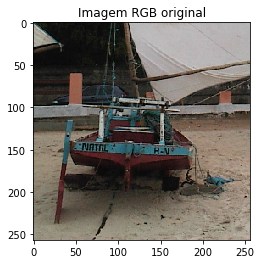

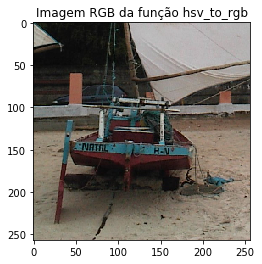

In [19]:
#teste
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import colorsys

I = mpimg.imread('./data/boat.tif')

plt.figure()
plt.imshow(I)
plt.title("Imagem RGB original")

r = I[:,:,0].ravel()
g = I[:,:,1].ravel()
b = I[:,:,2].ravel()
g = map(colorsys.rgb_to_hsv, r, g, b)
ga=np.array(list(g)).reshape(I.shape)

rgbImg = hsv_to_rgb(ga)

plt.figure()
plt.imshow(I)
plt.title("Imagem RGB da função hsv_to_rgb")

difR = np.abs(I[:,:,0] - rgbImg[:,:,0])
difG = np.abs(I[:,:,1] - rgbImg[:,:,1])
difB = np.abs(I[:,:,2] - rgbImg[:,:,2])

print("diferença máximo entre os canais R: ", np.max(difR))
print("diferença máximo entre os canais G: ", np.max(difG))
print("diferença máximo entre os canais B: ", np.max(difB))

print("\ndiferença mínima entre os canais R: ", np.min(difR))
print("diferença mínima entre os canais G: ", np.min(difG))
print("diferença mínima entre os canais B: ", np.min(difB))